# Machine Learning 2023/2024

## First Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

### Loading the Dataset

In [2]:
df = pd.read_csv("Postures.csv", sep=",")
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


In [3]:
incomplete_columns = []
cols_to_discard = []
for col in df.columns:
    proportion = (df[col] == '?').mean() * 100
    if proportion > 0:
        print (f'Proportion of missing values in column {col}: {round (proportion, 2)}%')
    if proportion > 65:                #escolhemos apagar as colunas com mais de 65% dos dados em falta
        cols_to_discard.append(col)
    else:
        incomplete_columns.append(col)
        

Proportion of missing values in column X3: 0.88%
Proportion of missing values in column Y3: 0.88%
Proportion of missing values in column Z3: 0.88%
Proportion of missing values in column X4: 4.0%
Proportion of missing values in column Y4: 4.0%
Proportion of missing values in column Z4: 4.0%
Proportion of missing values in column X5: 16.68%
Proportion of missing values in column Y5: 16.68%
Proportion of missing values in column Z5: 16.68%
Proportion of missing values in column X6: 33.1%
Proportion of missing values in column Y6: 33.1%
Proportion of missing values in column Z6: 33.1%
Proportion of missing values in column X7: 50.13%
Proportion of missing values in column Y7: 50.13%
Proportion of missing values in column Z7: 50.13%
Proportion of missing values in column X8: 60.86%
Proportion of missing values in column Y8: 60.86%
Proportion of missing values in column Z8: 60.86%
Proportion of missing values in column X9: 69.31%
Proportion of missing values in column Y9: 69.31%
Proportion o

In [4]:
#df = df.select_dtypes(include='float64').columns
df['User'] = df['User'].astype('category')

if df.shape[0] > 78095:
    df = df.drop(0, axis = 0)
df_x = df.drop("Class", axis = 1)
for col in cols_to_discard:
    df_x = df_x.drop(col, axis = 1)
df_y = df["Class"]


In [5]:
df_x = df_x.drop("User", axis = 1)

In [6]:
df_x
df_x = df_x.replace('?', np.nan)
df_x

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8
1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.9019397735909,...,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919,-22.8338299139098,104.593912875762,-53.1261355228787,61.4949522101345,101.205748000188,-6.54311453354464
78092,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.7439236254982,...,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896,61.3900145605159,101.468284194012,-5.98537080649334,88.1772331562548,60.7806417592771,-62.1305625712145
78093,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.2256749040353,...,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443,88.2910287028482,60.3627679995225,-62.7187354592767,-1.77949490376791,98.0894592678955,3.83590370588782
78094,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.7159145624784,...,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984,-1.58141492943602,98.0174111620326,3.39429131311924,88.4657093720691,60.0507908377745,-63.2216259324485


In [7]:
df_y

1        1
2        1
3        1
4        1
5        1
        ..
78091    5
78092    5
78093    5
78094    5
78095    5
Name: Class, Length: 78095, dtype: int64

In [8]:
df_y.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_x.values, 
                                                    df_y.values, 
                                                    random_state=0, test_size = 0.25, shuffle = True)

print(X_train.shape)
print(X_test.shape)


(58571, 27)
(19524, 27)


In [10]:
df["User"].unique()

[0, 1, 2, 4, 5, ..., 10, 11, 12, 13, 14]
Length: 14
Categories (14, int64): [0, 1, 2, 4, ..., 11, 12, 13, 14]

Data Scaling analisys

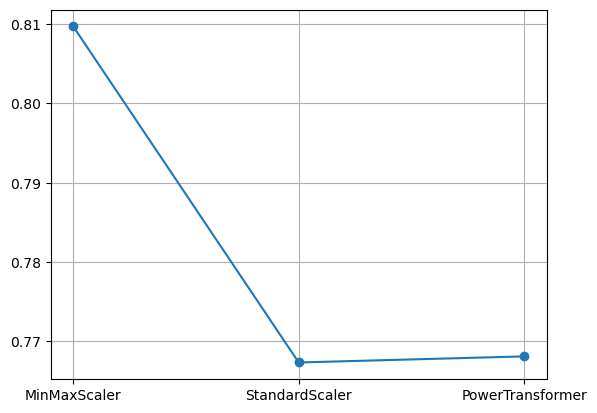

In [34]:
scaler1 = MinMaxScaler().fit(X_train)
Xt_train1 = scaler1.transform(X_train)
Xt_test1  = scaler1.transform(X_test)

scaler2 = StandardScaler().fit(X_train)
Xt_train2 = scaler2.transform(X_train)
Xt_test2  = scaler2.transform(X_test)

scaler3 = PowerTransformer().fit(X_train)
Xt_train3 = scaler3.transform(X_train)
Xt_test3 = scaler3.transform(X_test)


imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp1.fit(Xt_train1)
Xt_train1 = imp.transform(Xt_train1)
Xt_test1 = imp.transform(Xt_test1)

imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp2.fit(Xt_train2)
Xt_train2 = imp.transform(Xt_train2)
Xt_test2 = imp.transform(Xt_test2)

imp3 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp3.fit(Xt_train3)
Xt_train3 = imp.transform(Xt_train3)
Xt_test3 = imp.transform(Xt_test3)

lrmdl1 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train1, y_train)
lrmdl2 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train2, y_train)
lrmdl3 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train3, y_train)

sk_preds1=lrmdl1.predict(Xt_test1)
sk_preds2=lrmdl2.predict(Xt_test2)
sk_preds3=lrmdl3.predict(Xt_test3)

scalers = ["MinMaxScaler", "StandardScaler", "PowerTransformer"]
accuracies = [accuracy_score(y_test, sk_preds1), accuracy_score(y_test, sk_preds2), accuracy_score(y_test, sk_preds3)]

plt.plot(scalers, accuracies, marker = "o")
plt.grid()
plt.show()

Data Scaling

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)
Xt_train = scaler.transform(X_train)
Xt_test  = scaler.transform(X_test)

Data imputation analisys

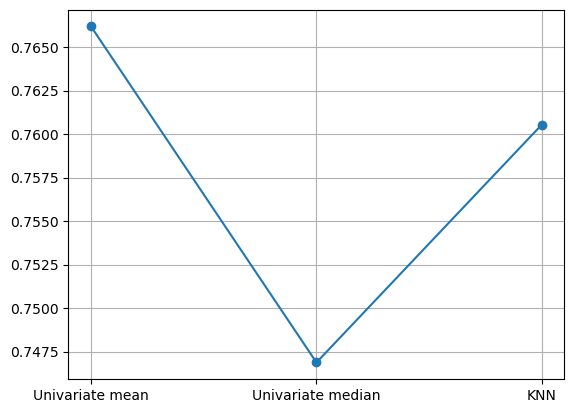

In [38]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp1.fit(Xt_train)
Xt_train1 = imp1.transform(Xt_train)
Xt_test1  = imp1.transform(Xt_test)

imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
imp2.fit(Xt_train)
Xt_train2 = imp2.transform(Xt_train)
Xt_test2  = imp2.transform(Xt_test)

imp3 = KNNImputer(n_neighbors=5, weights="uniform")
Xt_train3 = imp3.fit_transform(Xt_train)
Xt_test3 = imp3.transform(Xt_test)

lrmdl1 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train1, y_train)
lrmdl2 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train2, y_train)
lrmdl3 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train3, y_train)

sk_preds1=lrmdl1.predict(Xt_test1)
sk_preds2=lrmdl2.predict(Xt_test2)
sk_preds3=lrmdl3.predict(Xt_test3)

imputers = ["Univariate mean", "Univariate median", "KNN"]
accuracies = [accuracy_score(y_test, sk_preds1), accuracy_score(y_test, sk_preds2), accuracy_score(y_test, sk_preds3)]

plt.plot(imputers, accuracies, marker = "o")
plt.grid()
plt.show()

Data imputation

In [12]:
#Univariate imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xt_train)
Xt_train = imp.transform(Xt_train)
Xt_test  = imp.transform(Xt_test)

In [13]:
#knn imputer
n_neighbors = [2, 5, 200]
for i in n_neighbors:
    print("\n", i, " neighbors: ")
    imputer = KNNImputer(n_neighbors=i, weights="uniform")
    Xt_train = imputer.fit_transform(Xt_train)
    print(pd.DataFrame(Xt_train))
    
imputer = KNNImputer(n_neighbors=5, weights="uniform")
Xt_train = imputer.fit_transform(Xt_train)
Xt_test = imputer.transform(Xt_test)


 2  neighbors: 
             0         1         2         3         4         5         6   \
0     -0.027731  0.039945  1.154998 -1.094878  0.093505  1.330802  0.884544   
1     -1.888388  0.387223 -1.497646  1.288786 -1.005389 -0.602529 -1.716963   
2     -0.911645  0.654338  0.373020  1.086026 -1.081479 -0.324474  1.679195   
3      0.345365 -1.751003 -1.255220  1.032482  1.174764  1.175622  0.000820   
4      1.211017 -0.280547 -0.322070  0.570647  1.328944  1.142028  0.192254   
...         ...       ...       ...       ...       ...       ...       ...   
58566 -0.532636  1.547809  1.361361 -0.434793  0.245160  0.941874  0.625942   
58567  0.543750 -0.024216 -0.100262  0.286414  1.543266  0.030251  0.036432   
58568  1.649758  1.142344  1.301033 -0.273744  0.080337  1.415802  0.298246   
58569 -0.857662  0.381828  0.201064  0.776160 -0.066087  0.004162 -0.075836   
58570 -0.145802  1.359605  1.580857  1.161172 -0.359186 -0.695605  0.322477   

             7         8         9

Some usefull functions

In [14]:
def drawGraf(preds, title):
    plt.figure(figsize=(3,3))
    plt.scatter(preds, y_test)
    plt.plot((0, 150), (0,150), c="r")
    plt.grid()
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.title(title)
    plt.show()

In [15]:
def printAvalStat(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")

Logistic regression classification model

In [16]:
#lrmdl = LogisticRegression(random_state=0)
#lrmdl.fit(X_crit_train_s, y_crit_train)

lrmdl = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train, y_train)

sk_preds=lrmdl.predict(Xt_test)


#b0=mdl.intercept_[0]
#b1=mdl.coef_[0][0]
#print("Intercept (b0): %7.4f"% b0) 
#print("Slope     (b1): %7.4f"% b1) 

Decision tree classifier

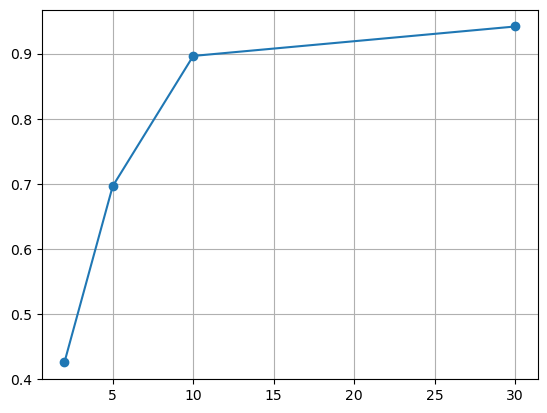

In [25]:
max_depths = [2, 5, 10, 30]
accs = []

for depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=depth) #parametros no construtor
    dt = dt.fit(Xt_train , y_train)
    dt_preds= dt.predict(Xt_test)
    accs.append(accuracy_score(y_test, dt_preds))

plt.plot(max_depths, accs, marker = "o")
plt.grid()
plt.show()

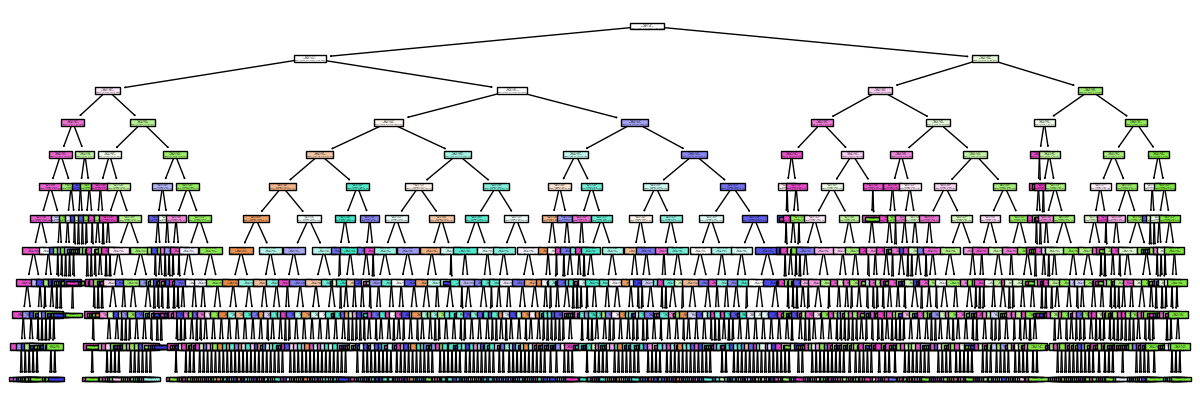

In [29]:
dt = tree.DecisionTreeClassifier(max_depth=11) #parametros no construtor
dt = dt.fit(Xt_train , y_train)

plt.figure(figsize=(15, 5))
r=tree.plot_tree(dt, filled=True)#, feature_names= df.columns)
plt.show()

In [30]:
dt_preds= dt.predict(Xt_test)

Naive Bayes classifier

In [19]:
mdl=GaussianNB()
mdl.fit(Xt_train,y_train)

mdl = mdl.fit(Xt_train,y_train)
nb_preds=mdl.predict(Xt_test)

In [20]:
#x = np.linspace(-1, 8, 100)
#yA = normA.pdf(x)
#yB = normB.pdf(x)

#plt.plot(x, yA,'r-', lw=1, alpha=0.6, label='ClassA')
#plt.plot(x, yB,'b-', lw=1, alpha=0.6, label='ClassB')
#plt.legend()
#plt.grid()
#plt.show()

K-Nearest Neighbours Classifier

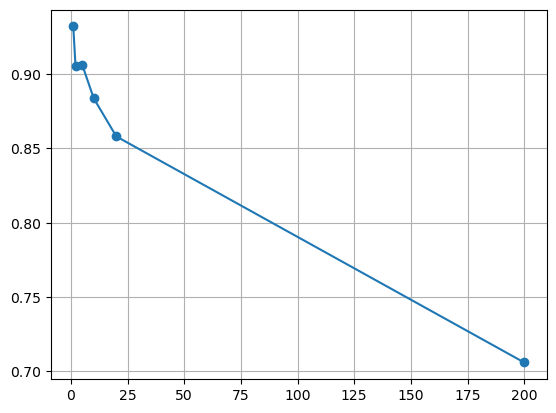

In [21]:
n_neighbors = [1, 2, 5, 10, 20, 200]
accs = []

for i in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xt_train, y_train)
    preds=knn.predict(Xt_test)
    accs.append(accuracy_score(y_test, preds))

plt.plot(n_neighbors, accs, marker = "o")
plt.grid()
plt.show()

#escolhemos 5 neighbors pelo superior racio de accurary por nºneighbors porque nº muito baixo de vizinhos apresenta tipicamente uma elevada variação
#mostrando um bom equilibrio entre elevado accuracy e baixo nº de neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xt_train, y_train)
kn_preds=knn.predict(Xt_test)

In [22]:
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds, average ="weighted"))
    print("The Recall is: %7.4f" % recall_score(truth, preds, average ="weighted"))
    print("The F1 score is: %7.4f" % f1_score(truth, preds, average ="weighted"))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print("0 = negative & 1 = positive:\n")
    print(pd.DataFrame(confusion_matrix(truth, preds)))
    print("\n")

In [31]:
### Resultados da avaliação do modelo decision tree classifier ###
print("Resultados da avaliação do modelo decision tree classifier:\n")
printClassResults(y_test, dt_preds)

### Resultados da avaliação do modelo logistic regression ###
print("Resultados da avaliação do modelo logistic regression:\n")
printClassResults(y_test, sk_preds)

### Resultados da avaliação do modelo logistic regression ###
print("Resultados da avaliação do modelo logistic regression:\n")
printClassResults(y_test, nb_preds)

### Resultados da avaliação do modelo logistic regression ###
print("Resultados da avaliação do modelo logistic regression:\n")
printClassResults(y_test, kn_preds)

Resultados da avaliação do modelo decision tree classifier:

The Accuracy is:  0.9119
The Precision is:  0.9123
The Recall is:  0.9119
The F1 score is:  0.9117
The Matthews correlation coefficient is:  0.8900

This is the Confusion Matrix
0 = negative & 1 = positive:

      0     1     2     3     4
0  3877     8   101    18     9
1     8  3455    13    76   256
2    82    15  3818    98    34
3    23   128   233  3238    97
4    14   332   100    76  3415


Resultados da avaliação do modelo logistic regression:

The Accuracy is:  0.7681
The Precision is:  0.7657
The Recall is:  0.7681
The F1 score is:  0.7664
The Matthews correlation coefficient is:  0.7102

This is the Confusion Matrix
0 = negative & 1 = positive:

      0     1     2     3     4
0  3431     8   289   108   177
1    33  3262    95   137   281
2   333    15  3142   497    60
3   247   254   443  2339   436
4   185   465   105   360  2822


Resultados da avaliação do modelo logistic regression:

The Accuracy is:  0.620